# Pruebas de Bondad de Ajuste

Sea $X_1,\dots,X_n$ una muestra aleatoria iid con función de distribución desconocida $F$.
El objetivo de las pruebas de bondad de ajuste es contrastar

$H_0:\; F = F_0$
contra
$H_1:\; F \neq F_0$

donde $F_0$ es una distribución teórica especificada.

A continuación se presentan dos pruebas fundamentales: Ji-cuadrada de Pearson y Kolmogorov–Smirnov.

---

# 1. Prueba Ji-cuadrada de Pearson

## Planteamiento

Sea una partición del espacio muestral en clases:

$A_1, A_2, \dots, A_k$.

Definimos:

- $O_i$: frecuencia observada en la clase $A_i$
- $E_i = n p_i(\theta)$: frecuencia esperada bajo $H_0$

donde $p_i(\theta) = P_\theta(X \in A_i)$.

Si el parámetro es desconocido se sustituye por un estimador $\hat{\theta}$.

---

## Estadístico de prueba

$$
\chi^2 =
\sum_{i=1}^k
\frac{(O_i - E_i)^2}{E_i}.
$$

---

## Distribución asintótica

Bajo $H_0$ y condiciones regulares:

$$
\chi^2 \xrightarrow{d} \chi^2_{k-1-r}
$$

donde:

- $k$ = número de clases
- $r$ = número de parámetros estimados

---

## Regla de decisión

Se rechaza $H_0$ si

$$
\chi^2 > \chi^2_{1-\alpha,\,k-1-r}.
$$

---

## Caso Poisson

Si $X \sim \text{Poisson}(\lambda)$ entonces

$$
p_i(\lambda) = e^{-\lambda}\frac{\lambda^i}{i!}.
$$

Si $\lambda$ es desconocido:

$$
\hat{\lambda} = \bar{X}.
$$

Los grados de libertad son:

$$
gl = k - 2.
$$

---

## Condició# 2. Prueba de Kolmogorov–Smirnov

## Función de distribución empírica

La función de distribución empírica se define como

$$
F_n(x) =
\frac{1}{n}
\sum_{i=1}^n
\mathbf{1}\{X_i \le x\}.
$$

Por el teorema de Glivenko–Cantelli:

$$
\sup_x |F_n(x) - F(x)| \to 0 \quad \text{c.s.}
$$

---

## Estadístico de Kolmogorov

$$
D_n =
\sup_x |F_n(x) - F_0(x)|.
$$

Este mide la máxima discrepancia entre la distribución empírica y la teórica.

---

## Relación con el puente browniano (resultado fundamental)

Bajo la hipótesis nula $H_0: F = F_0$, si $F_0$ es continua, entonces por el **teorema de Donsker** (o teorema funcional del límite central):

$$
\sqrt{n}\,\big(F_n(x) - F_0(x)\big)
\Rightarrow
B(F_0(x)),
$$

donde $B(t)$ es un **puente browniano** en $[0,1]$.

Equivalentemente, usando la transformación integral de probabilidad:

Si $U_i = F_0(X_i)$, entonces $U_i \sim \text{Uniforme}(0,1)$ y

$$
\sqrt{n}\,\big(F_n(x) - F_0(x)\big)
\Rightarrow
B(u), \quad u \in [0,1].
$$

---

## Definición de puente browniano

Un proceso $B(t)$, $t \in [0,1]$, es un puente browniano si:

- $B(0) = 0$
- $B(1) = 0$
- Es un proceso gaussiano con media cero
- Covarianza:

$$
\mathrm{Cov}(B(s), B(t))
=
\min(s,t) - st.
$$

Puede construirse como

$$
B(t) = W(t) - t W(1),
$$

donde $W(t)$ es un movimiento browniano estándar.

---

## Distribución límite del estadístico KS

Como consecuencia,

$$
\sqrt{n}D_n
=
\sup_x \left| \sqrt{n}(F_n(x)-F_0(x)) \right|
\Rightarrow
\sup_{0 \le t \le 1} |B(t)|.
$$

Por lo tanto, la distribución límite del estadístico es

$$
K =
\sup_{0 \le t \le 1} |B(t)|.
$$

---

## Distribución de Kolmogorov

La función de distribución es

$$
P(K \le z)
=
1 - 2\sum_{k=1}^{\infty}
(-1)^{k-1} e^{-2k^2 z^2}.
$$

Esta distribución es **libre de parámetros**, lo que explica por qué la prueba KS es no paramétrica.

---

## Regla de decisión

Se rechaza $H_0$ si

$$
D_n > \frac{c_\alpha}{\sqrt{n}}.
$$

Valores típicos:

| α | $c_\alpha$ |
|---|-----------|
0.10 | 1.22 |
0.05 | 1.36 |
0.01 | 1.63 |

---

## Interpretación probabilística profunda

La prueba KS mide la distancia suprema entre la distribución empírica y la verdadera.
Asintóticamente, esta diferencia se comporta como un puente browniano, es decir,
una fluctuación gaussiana condicionada a regresar a cero en el extremo del intervalo.
-cuadrada:

$$
\sum \frac{(O-E)^2}{E}
\approx
\int \frac{(f_n - f)^2}{f}.
$$

Kolmogorov:

$$
\sup_x |F_n - F|.
$$

Por tanto:

- Ji-cuadrada ≈ distancia tipo $L^2$
- KS ≈ distancia supremo


In [1]:
from scipy.stats import poisson, chisquare, kstest, gamma, norm , lognorm, t
import pandas as pd 
import matplotlib.pyplot as plt
from random_numbers import GLC, Poisson
import numpy as np

# **Datos Poisson**

In [2]:
size = 100000

poi = Poisson(10)
data = np.array(poi.sample(size))

lam_hat = np.mean(data)

values, observed = np.unique(data, return_counts=True)

expected_probs = poisson.pmf(values, lam_hat)
expected = expected_probs * len(data)
expected = expected * observed.sum() / expected.sum()

chi2_stat, p_value = chisquare(observed, expected)

print("Lambda estimado:", lam_hat)
print("Chi-cuadrada:", chi2_stat)
print("p-value:", p_value)

Lambda estimado: 9.99702
Chi-cuadrada: 36.63582026096286
p-value: 0.10206827026959786


# **Datos Uniformes**

In [3]:
size = 100000
glc = GLC()
data_u = glc.sample(size) 

stat, p_value = kstest(data_u, 'uniform',args=(0,1))

print("D:", stat)
print("p-value:", p_value)

D: 0.0030732037576255977
p-value: 0.30081462450570184


In [4]:
kstest?

In [5]:
claims_ins = pd.read_csv("data/claims_q12023.csv",sep=None, engine='python')

In [6]:
claims_ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cust_age               1000 non-null   int64  
 1   policy_id              1000 non-null   int64  
 2   coverage_start_date    1000 non-null   object 
 3   cust_region            1000 non-null   object 
 4   sum_assured_group      1000 non-null   object 
 5   ins_deductible         1000 non-null   int64  
 6   annual_prem            1000 non-null   float64
 7   zip_code               1000 non-null   int64  
 8   insured_sex            1000 non-null   object 
 9   edu_lvl                1000 non-null   object 
 10  marital_status         1000 non-null   object 
 11  claim_incurred_date    1000 non-null   object 
 12  claim_type             1000 non-null   object 
 13  acc_type               822 non-null    object 
 14  emg_services_notified  909 non-null    object 
 15  incid

In [7]:
claims_ins['claim_type'].value_counts()

claim_type
multi-vehicle collision     419
single vehicle collision    403
theft                        94
parked car                   84
Name: count, dtype: int64

In [8]:
x = "total_claim_amount"
x = claims_ins[x].values/1000

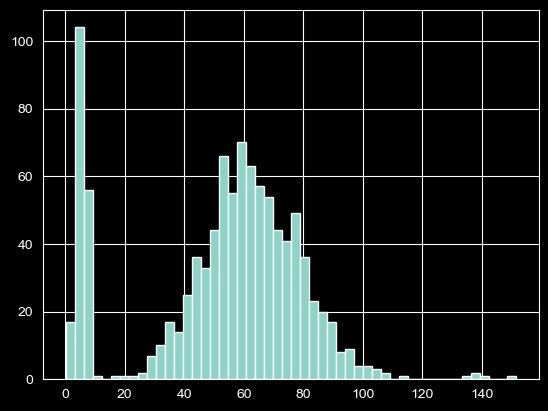

In [9]:
plt.hist(x,bins=50)
plt.show()

In [10]:
shape_est, loc_est, scale_est = gamma.fit(x, floc=0)

ks_statistic, p_value = kstest(data, 'gamma', args=(shape_est, loc_est, scale_est))

print(f"\nKS Statistic: {ks_statistic}")
print(f"P-value: {p_value}")


KS Statistic: 0.8311743318647532
P-value: 0.0


In [43]:
gamma.fit?

Signature: gamma.fit(data, *args, **kwds)
Docstring:
Return estimates of shape (if applicable), location, and scale
parameters from data. The default estimation method is Maximum
Likelihood Estimation (MLE), but Method of Moments (MM)
is also available.

Starting estimates for the fit are given by input arguments;
for any arguments not provided with starting estimates,
``self._fitstart(data)`` is called to generate such.

One can hold some parameters fixed to specific values by passing in
keyword arguments ``f0``, ``f1``, ..., ``fn`` (for shape parameters)
and ``floc`` and ``fscale`` (for location and scale parameters,
respectively).

Parameters
----------
data : array_like or `CensoredData` instance
    Data to use in estimating the distribution parameters.
arg1, arg2, arg3,... : floats, optional
    Starting value(s) for any shape-characterizing arguments (those not
    provided will be determined by a call to ``_fitstart(data)``).
    No default value.
**kwds : floats, optional
    

In [11]:
shape_est, loc_est, scale_est = gamma.fit(x)

ks_statistic, p_value = kstest(data, 'gamma', args=(shape_est, loc_est, scale_est))

print(f"\nKS Statistic: {ks_statistic}")
print(f"P-value: {p_value}")


KS Statistic: 0.8946067779093612
P-value: 0.0


In [12]:
mu, sigma = norm.fit(x)

ks_statistic, p_value = kstest(data, 'norm', args=(mu,sigma))

print(f"\nKS Statistic: {ks_statistic}")
print(f"P-value: {p_value}")


KS Statistic: 0.8961056275685517
P-value: 0.0


array([[<Axes: title={'center': 'multi-vehicle collision'}>,
        <Axes: title={'center': 'parked car'}>],
       [<Axes: title={'center': 'single vehicle collision'}>,
        <Axes: title={'center': 'theft'}>]], dtype=object)

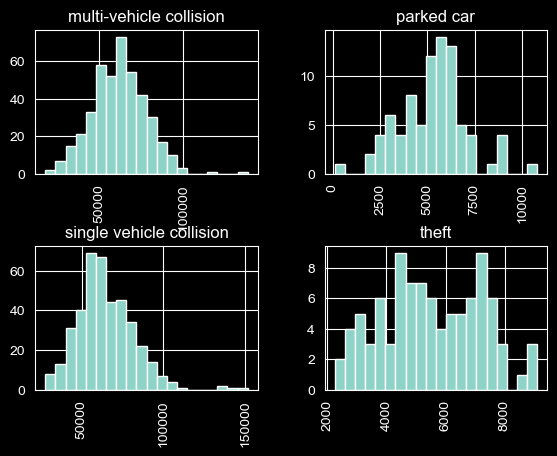

In [13]:
claims_ins.hist(column='total_claim_amount', bins=20, by ='claim_type')

In [4]:
insurance =  pd.read_csv("data/insurance.csv")
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


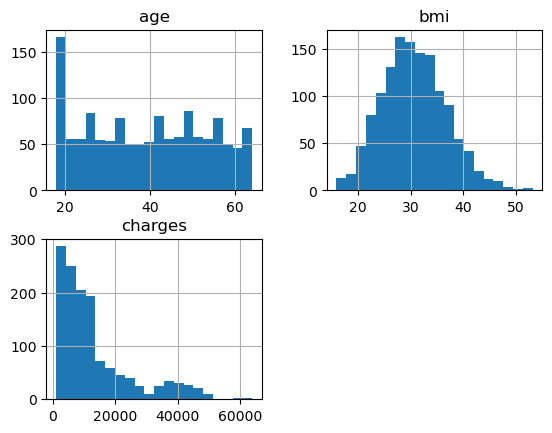

In [14]:
insurance.hist(column=['age','bmi','charges'],bins=20)
plt.show()

In [6]:
charges = insurance['charges'].values/1000
shape_est, loc_est, scale_est = gamma.fit(charges)

ks_statistic, p_value = kstest(charges, 'gamma', args=(shape_est, loc_est, scale_est))

print(f"\nKS Statistic: {ks_statistic}")
print(f"P-value: {p_value}")


KS Statistic: 0.060563125855732425
P-value: 0.00010422756210036398


In [9]:
s, loc ,scale = lognorm.fit(charges,floc=0)

ks_statistic, p_value = kstest(charges, 'lognorm', args=(s,loc,scale))

print(f"\nKS Statistic: {ks_statistic}")
print(f"P-value: {p_value}")


KS Statistic: 0.036584404885824484
P-value: 0.054293574426822366


In [11]:
log_charges = np.log(charges)

mu, sigma = norm.fit(log_charges)

ks_statistic, p_value = kstest(log_charges, 'norm', args=(mu,sigma))

print(f"\nKS Statistic: {ks_statistic}")
print(f"P-value: {p_value}")


KS Statistic: 0.036584404885824484
P-value: 0.054293574426822366


In [12]:
bmi = insurance['bmi'].values
mu, sigma = norm.fit(bmi)

ks_statistic, p_value = kstest(bmi, 'norm', args=(mu,sigma))

print(f"\nKS Statistic: {ks_statistic}")
print(f"P-value: {p_value}")


KS Statistic: 0.02613962682509635
P-value: 0.31453976932347394


In [17]:
import yfinance as yf

In [50]:
 nvidia = yf.download("NVDA",period="5y")

[*********************100%***********************]  1 of 1 completed


In [51]:
 nvidia.head()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2021-02-22,14.315492,15.090811,14.284828,14.733316,325884000
2021-02-23,14.102343,14.198822,13.351952,14.035779,391780000
2021-02-24,14.458343,14.466071,13.717426,14.083148,448320000
2021-02-25,13.270183,14.334440,13.179189,14.006113,824436000
2021-02-26,13.676040,13.815646,13.323531,13.713932,500932000


In [52]:
x = nvidia['Close'].values

r = np.log(x[1:]/x[:-1])

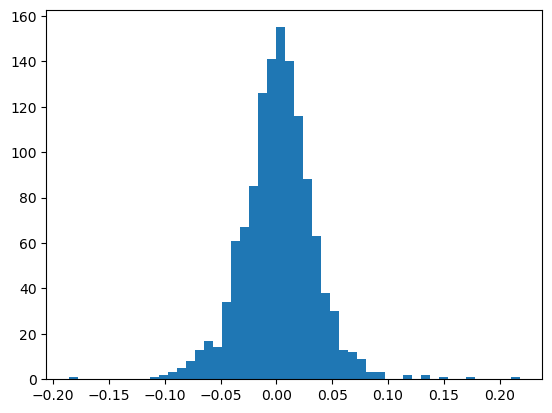

In [53]:
plt.hist(r,bins=50)
plt.show()

In [67]:
mu, sigma = norm.fit(r)

ks_statistic, p_value = kstest(r, 'norm', args=(mu,sigma))

print(f"\nKS Statistic: {ks_statistic}")
print(f"P-value: {p_value}")


KS Statistic: [0.04462182]
P-value: [0.01309373]


In [75]:
df , loc,  scale = t.fit(r)

ks_statistic, p_value = kstest(r, 't', args=(df,loc, scale))

print(f"\nKS Statistic: {ks_statistic}")
print(f"P-value: {p_value}")


KS Statistic: [0.01650411]
P-value: [0.87813422]
